In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

from warnings import filterwarnings
filterwarnings('ignore')

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score, silhouette_samples

In [36]:
df = pd.read_csv('Mall_Customers.csv')
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [37]:
df.shape

(200, 5)

In [38]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [39]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

## EDA

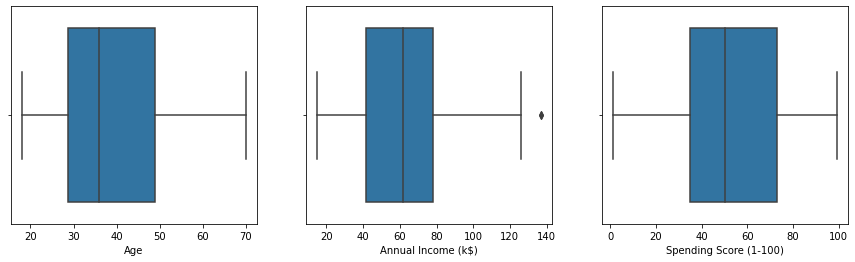

In [40]:
# consider the numeric variables
df_num = df.drop(['CustomerID','Gender'], axis = 1)

fig, ax = plt.subplots(nrows = 1, ncols = 3, figsize=(15, 4))

for variable, subplot in zip(df_num.columns, ax.flatten()):
    sns.boxplot(df[variable], ax = subplot)

plt.show()

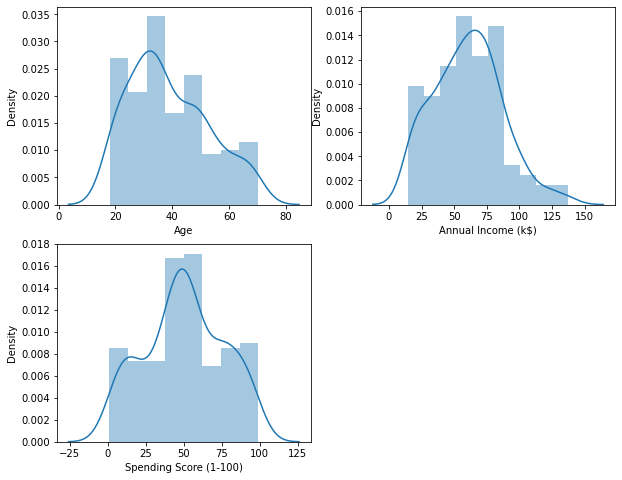

<Figure size 432x288 with 0 Axes>

In [41]:
fig, ax = plt.subplots(nrows = 2, ncols= 2, figsize=(10, 8))
 
for variable, subplot in zip(df.columns[2:], ax.flatten()):
    sns.distplot(df[variable] , ax=subplot)

fig.delaxes(ax[1][1])
plt.show()
plt.tight_layout()

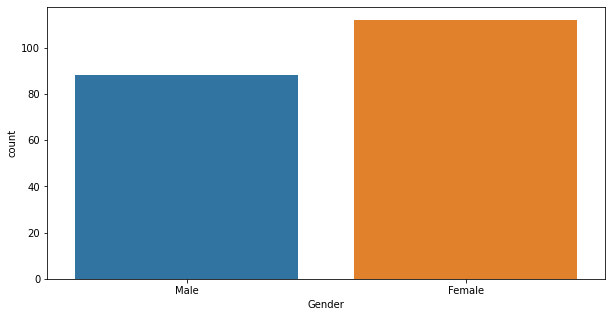

In [42]:
plt.figure(figsize = (10 , 5))
sns.countplot(x = 'Gender' , data = df)
plt.show()

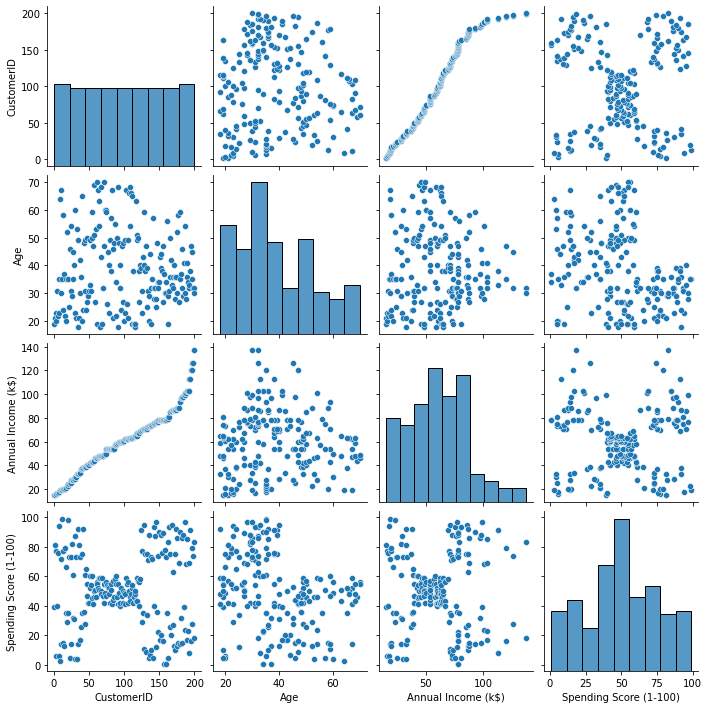

In [43]:
sns.pairplot(df)
plt.show()

<AxesSubplot:xlabel='Age', ylabel='Annual Income (k$)'>

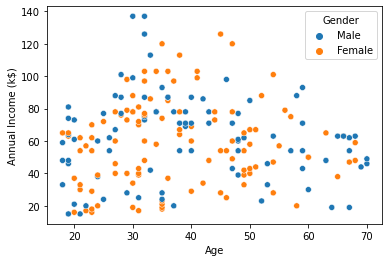

In [44]:
sns.scatterplot(data=df,x='Age',y='Annual Income (k$)',hue='Gender')

<AxesSubplot:xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

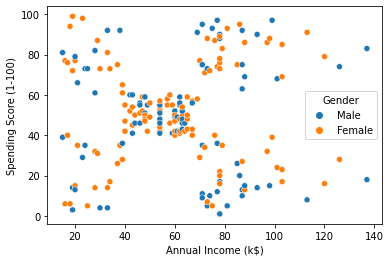

In [45]:
sns.scatterplot(data=df,x='Annual Income (k$)',y='Spending Score (1-100)',hue='Gender')

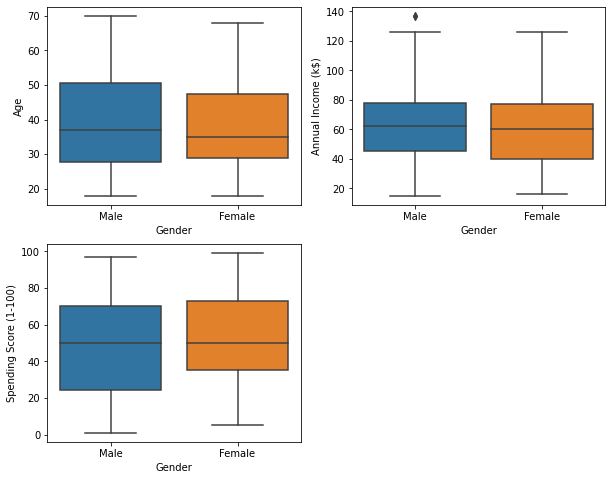

<Figure size 432x288 with 0 Axes>

In [46]:
fig, ax = plt.subplots(nrows = 2, ncols= 2, figsize=(10, 8))
 
for variable, subplot in zip(df.columns[2:], ax.flatten()):
    sns.boxplot(x=df['Gender'],y=df[variable],ax=subplot)

fig.delaxes(ax[1][1])
plt.show()
plt.tight_layout()

## MODEL BUILDING

## Considering Age and Spending Score

In [47]:
X_filtered = df[['Age', 'Spending Score (1-100)']]

X_norm = StandardScaler()

num_norm = X_norm.fit_transform(X_filtered)

X = pd.DataFrame(num_norm, columns = X_filtered.columns)

X.head()

,Age,Spending Score (1-100)
0,-1.424569,-0.434801
1,-1.281035,1.195704
2,-1.352802,-1.715913
3,-1.137502,1.040418
4,-0.563369,-0.395980


### Using Elbow plot to find optimal value of K

In [48]:
wcss  = []
for i in range(1,21):
    kmeans = KMeans(n_clusters = i, random_state = 10)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

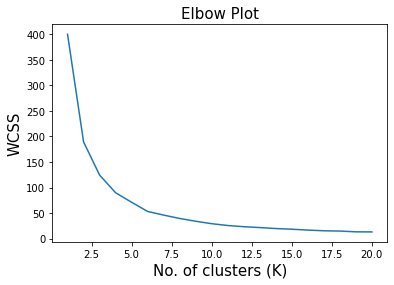

In [49]:
plt.plot(range(1,21), wcss)

plt.title('Elbow Plot', fontsize = 15)
plt.xlabel('No. of clusters (K)', fontsize = 15)
plt.ylabel('WCSS', fontsize = 15)

# display the plot
plt.show()

### Using Silhouette score to find optimal value of K

In [50]:
n_clusters = [2, 3, 4, 5, 6,7]

for K in n_clusters:
    cluster = KMeans (n_clusters= K, random_state= 10)
    predict = cluster.fit_predict(X)
    score = silhouette_score(X, predict, random_state= 10)
    print ("For {} clusters the silhouette score is {})".format(K, score))

For 2 clusters the silhouette score is 0.47212716430695223)
For 3 clusters the silhouette score is 0.440570770303506)
For 4 clusters the silhouette score is 0.4383860846564479)
For 5 clusters the silhouette score is 0.4236911130700454)
For 6 clusters the silhouette score is 0.45662830302385726)
For 7 clusters the silhouette score is 0.40624643359896007)


### Looking at above 2 methods we select K=6

In [51]:
df_1 = df.copy()

In [52]:
# build a K-Means model with 5 clusters
new_clusters = KMeans(n_clusters = 6, random_state = 10)

# fit the model
new_clusters.fit(X)

# append the cluster label for each point in the dataframe 'df_cust'
df_1['Cluster'] = new_clusters.labels_

In [53]:
df_1.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,1,Male,19,15,39,3
1,2,Male,21,15,81,1
2,3,Female,20,16,6,5
3,4,Female,23,16,77,1
4,5,Female,31,17,40,3


Text(0, 0.5, 'Number of Customers')

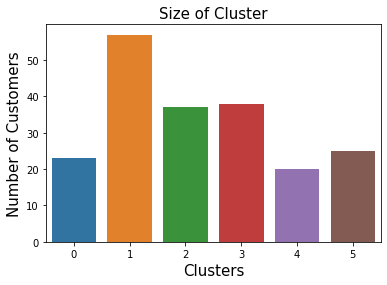

In [54]:
sns.countplot(data= df_1, x = 'Cluster')

plt.title('Size of Cluster', fontsize = 15)
plt.xlabel('Clusters', fontsize = 15)
plt.ylabel('Number of Customers', fontsize = 15)

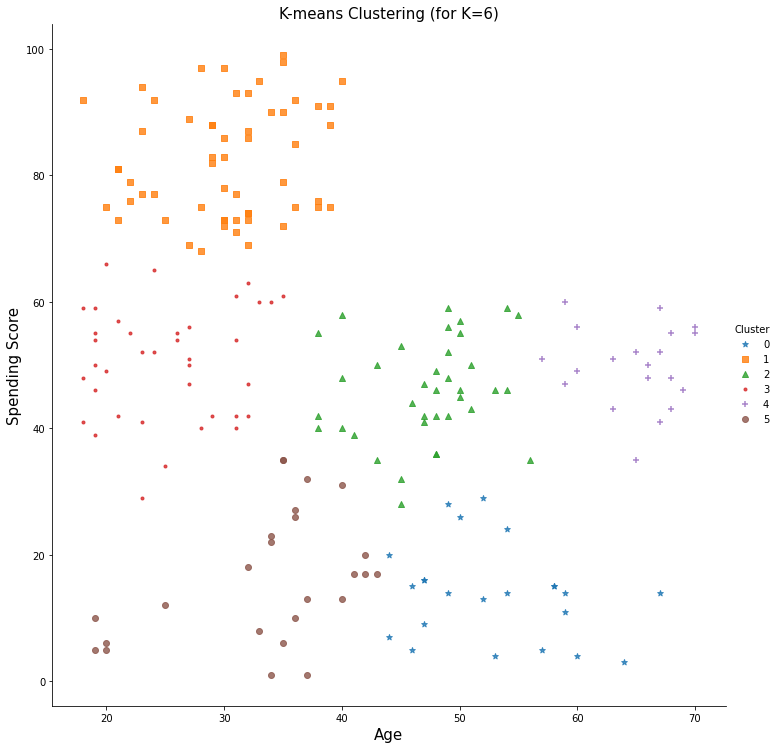

In [55]:
sns.lmplot(x = 'Age', y = 'Spending Score (1-100)', data = df_1, hue = 'Cluster', 
                markers = ['*', ',', '^', '.', '+','o'], fit_reg = False, size = 10)

# set the axes and plot labels
# set the font size using 'fontsize'
plt.title('K-means Clustering (for K=6)', fontsize = 15)
plt.xlabel('Age', fontsize = 15)
plt.ylabel('Spending Score', fontsize = 15)

# display the plot
plt.show()

## Considering Annual Income and Spending Score

In [57]:
X_filtered = df[['Annual Income (k$)', 'Spending Score (1-100)']]

X_norm = StandardScaler()

num_norm = X_norm.fit_transform(X_filtered)

X = pd.DataFrame(num_norm, columns = X_filtered.columns)

X.head()

,Annual Income (k$),Spending Score (1-100)
0,-1.738999,-0.434801
1,-1.738999,1.195704
2,-1.700830,-1.715913
3,-1.700830,1.040418
4,-1.662660,-0.395980


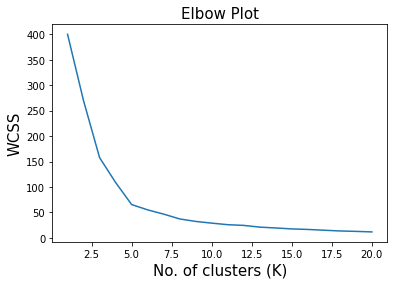

In [58]:
wcss  = []
for i in range(1,21):
    kmeans = KMeans(n_clusters = i, random_state = 10)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

plt.plot(range(1,21), wcss)

plt.title('Elbow Plot', fontsize = 15)
plt.xlabel('No. of clusters (K)', fontsize = 15)
plt.ylabel('WCSS', fontsize = 15)

# display the plot
plt.show()

In [59]:
n_clusters = [2, 3, 4, 5, 6,7]

for K in n_clusters:
    cluster = KMeans (n_clusters= K, random_state= 10)
    predict = cluster.fit_predict(X)
    score = silhouette_score(X, predict, random_state= 10)
    print ("For {} clusters the silhouette score is {})".format(K, score))

For 2 clusters the silhouette score is 0.28640637225274423)
For 3 clusters the silhouette score is 0.46658474419000145)
For 4 clusters the silhouette score is 0.4939069237513199)
For 5 clusters the silhouette score is 0.5546571631111091)
For 6 clusters the silhouette score is 0.5377141165734255)
For 7 clusters the silhouette score is 0.45298064520649645)


### We choose K=5

In [60]:
df_2 = df.copy()

In [61]:
# build a K-Means model with 5 clusters
new_clusters = KMeans(n_clusters = 5, random_state = 10)

# fit the model
new_clusters.fit(X)

# append the cluster label for each point in the dataframe 'df_cust'
df_2['Cluster'] = new_clusters.labels_

In [62]:
df_2.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,1,Male,19,15,39,3
1,2,Male,21,15,81,0
2,3,Female,20,16,6,3
3,4,Female,23,16,77,0
4,5,Female,31,17,40,3


Text(0, 0.5, 'Number of Customers')

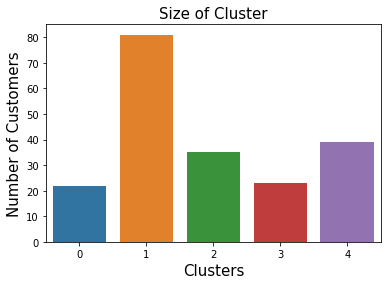

In [63]:
sns.countplot(data= df_2, x = 'Cluster')

plt.title('Size of Cluster', fontsize = 15)
plt.xlabel('Clusters', fontsize = 15)
plt.ylabel('Number of Customers', fontsize = 15)

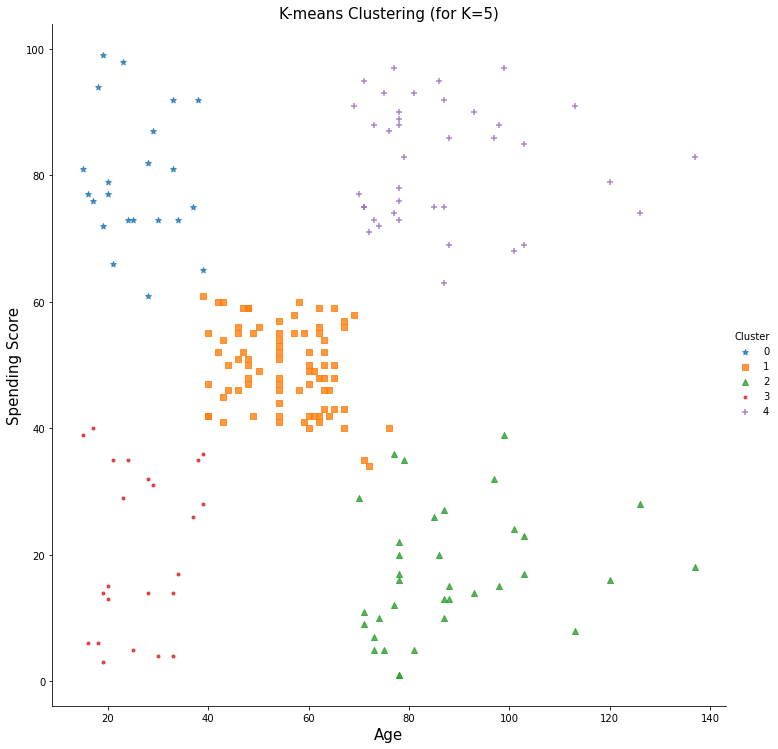

In [66]:
sns.lmplot(x = 'Annual Income (k$)', y = 'Spending Score (1-100)', data = df_2, hue = 'Cluster', 
                markers = ['*', ',', '^', '.', '+'], fit_reg = False, size = 10)

# set the axes and plot labels
# set the font size using 'fontsize'
plt.title('K-means Clustering (for K=5)', fontsize = 15)
plt.xlabel('Age', fontsize = 15)
plt.ylabel('Spending Score', fontsize = 15)

# display the plot
plt.show()